### Rolling Function
- It can be used to apply some aggregate function to n previous data to each data point
- eg. smoothing high frequency data by taking mean of last 50 data at each point

Using matplotlib backend: MacOSX


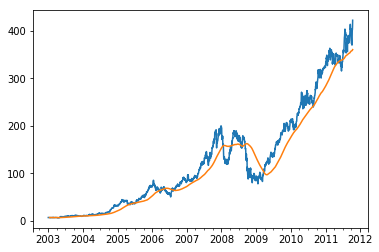

In [2]:
import pandas as pd
all_data = pd.read_csv("data/stock_px.csv", parse_dates=True, index_col=0)
data = all_data[["AAPL", "MSFT", "XOM"]].resample("B").ffill()
data.AAPL.plot()
smooth_data = data.AAPL.rolling(150, min_periods=10).mean()
smooth_data.plot()


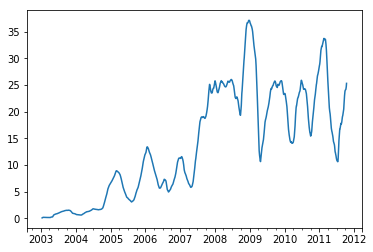

In [6]:
appl_std=data.AAPL.rolling(150, min_periods=10).std()
appl_std.plot()

### Rolling function with period

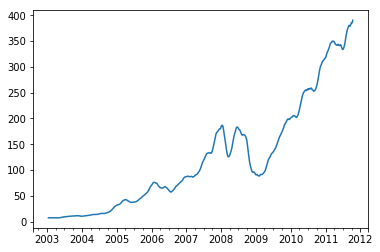

In [14]:
data.AAPL.rolling("50D", min_periods=10).mean().plot()

### Expanding Function
- It expands window size as moving through data

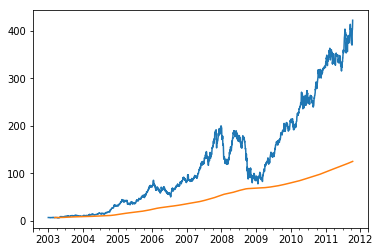

In [11]:
data.AAPL.plot()
data.AAPL.expanding(50).mean().plot()

### Exponentially Weighted Function
- Constant decay function which gives more wights on recent observations

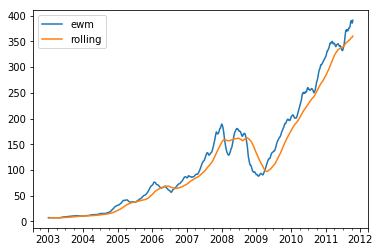

In [18]:
import matplotlib.pyplot as plt
data.AAPL.ewm(span=30).mean().plot(label="ewm")
smooth_data.plot(label="rolling")
plt.legend()

### Correlation Function

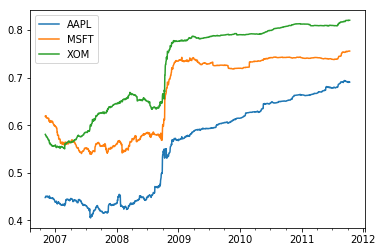

In [30]:
spx_daily_returns = all_data.SPX.asfreq("B").pct_change()
daily_returns_all = data.pct_change()

corr_with_spx = daily_returns_all.rolling(1000).corr(spx_daily_returns) 
corr_with_spx.plot()
